In [1]:
#import neccessary libraries
import sys
import os

# Add the path to the 'scripts' folder
sys.path.append(os.path.abspath('../scripts'))

from financial_news_eda import load_data, analyze_publication_dates, plot_publication_trends, analyze_publishers, plot_publisher_distribution


In [2]:
# Set the file path to your CSV file
file_path = "../data/raw_analyst_ratings.csv"

# Load the data
df = load_data(file_path)



object


In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.shape  

(1407328, 6)

In [5]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [7]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)  # Replace 'headline' with the actual column name if different

# Obtain descriptive statistics for headline lengths
#print(df['headline_length'].describe())

df['headline_length']

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline_length, Length: 1407328, dtype: int64

Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: publisher, Length: 1034, dtype: int64


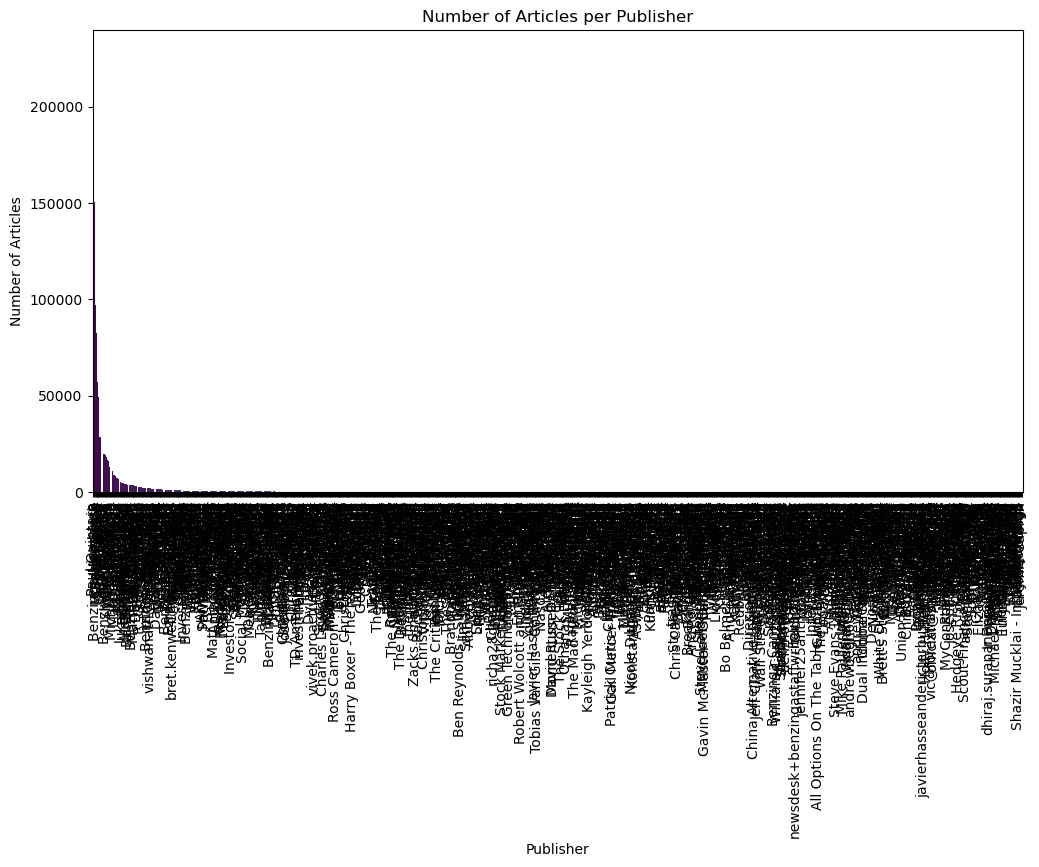

In [8]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()  # Replace 'publisher' with the actual column name if different

# Display the counts of articles per publisher
print(publisher_counts)

#Plot the number of articles per publisher
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


In [9]:
import pandas as pd
# This block will only execute if the date column is indeed a datetime type
if pd.api.types.is_datetime64_any_dtype(df['date']):
    if df['date'].dt.tzinfo is not None:
        print("Timezone-aware datetimes found. Converting to timezone-naive.")
        df['date'] = df['date'].dt.tz_convert('UTC')  # Optional: Convert to UTC if needed
        df['date'] = df['date'].dt.tz_localize(None)  # Remove timezone information
    else:
        print("No timezone-aware datetimes found. Proceeding with timezone-naive datetimes.")
else:
    print("Date column is not in datetime format. Ensure conversion is correct.")

# Analyze publication dates
def analyze_publication_dates(df):
    """
    Analyze the frequency of news publications by month.
    """
    try:
        # Aggregate the number of publications by month
        date_trends = df['date'].dt.to_period('M').value_counts().sort_index()
        return date_trends
    except Exception as e:
        print(f"Error in analyzing publication dates: {e}")
        return None

# Call the function and print results
date_trends = analyze_publication_dates(df)
print(date_trends)

Date column is not in datetime format. Ensure conversion is correct.
Error in analyzing publication dates: Can only use .dt accessor with datetimelike values
None


In [10]:
# Check for missing values after conversion
print(df['date'].isna().sum())


0


In [11]:
import pandas as pd

# Load the data
df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Update with your file path

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Check the conversion
print(df['date'].dtype)
print(df['date'].head())


datetime64[ns, UTC]
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]


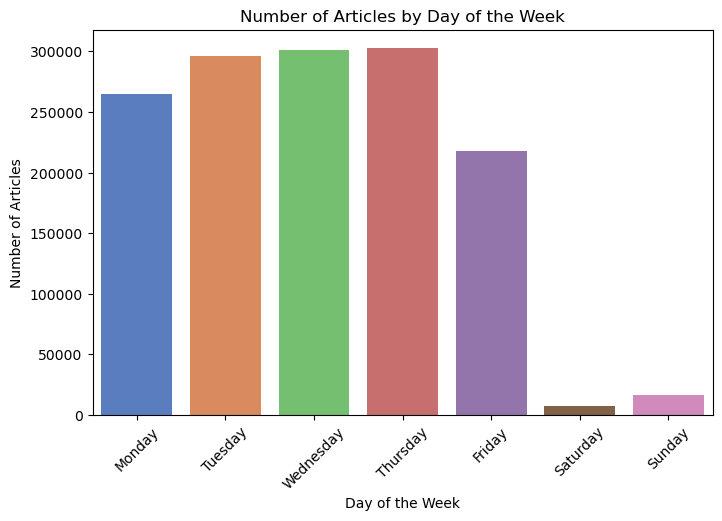

In [12]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Calculate the number of articles per day of the week
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the number of articles by day of the week
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="muted")
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()


In [13]:
df.to_csv('../data/processed_analyst_ratings.csv', index=False)  # Save as CSV

In [ ]:
# Load and preprocess data
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.to_csv('preprocessed_data.csv')  # Save the cleaned data for use in other notebooks
